<a href="https://colab.research.google.com/github/micheltrail-alt/MIT-Applied-AI-and-Data-Science-course/blob/main/DS_AI_CaseStudy_Pre_work_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Case Study: Data Science and AI Application using a Banking Dataset


# Problem Statement

In the banking industry, customer experience is a key driver of retention and satisfaction. Every day, banks receive thousands of customer messages and queries through various digital channels - mobile apps, websites, emails, and chatbots. These messages are often free-text entries, unstructured in nature, and span a wide variety of topics: blocked debit cards, failed transactions, transfer delays, loan requests, and more.

The volume and variability of these queries make manual analysis both impractical and inefficient. Human agents struggle to keep up, and business teams lack visibility into real-time customer pain points. This leads to slower response times, missed opportunities for proactive support, and difficulty in identifying recurring issues or emerging trends.

There is a pressing need for intelligent systems that can automatically process, categorize, and summarize these unstructured queries into meaningful insights that support business decisions and improve customer service operations.


# Objective

The goal of this case study is to showcase how a combination of traditional data science techniques and GenAI capabilities - particularly Large Language Models (LLMs) - can be applied to solve a real-world problem in the banking domain.

Specifically, the objectives of the use case are:

- **Preprocess and clean** raw customer queries to remove noise and standardize the data.
- **Analyze the frequency and distribution** of various customer intents using visualizations to understand what issues are most prevalent.
- **Use a LLM** to generate natural language summaries for each intent category, offering quick snapshots of what customers are saying.
- **Enable business stakeholders** to identify patterns, prioritize issue resolution, and improve service workflows using data-driven insights.

The overall goal is to reduce manual effort, improve response speed, and surface actionable intelligence from unstructured customer data.

# 1. Installing and Importing the Necessary Libraries

In [ ]:
!pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 MB 193.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 344.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 271.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 367.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 314.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 293.8 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.16-cp312-cp312-linux_x86_64.whl size=4503280 sha256=3371985e20b70ea00da1bd9d448a2297c80171674cc106a50f3d220d1e20a251
  Stored in directory: /tmp/pip-ephem-wheel-cache-xrjac6a0/wheels/90/82/ab/8784ee3fb99ddb07fd36a679ddbe63122cc07718f6c1eb3be8
Successfully built llama-cpp

Restart the runtime if prompted

In [ ]:
!pip install datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0


In [ ]:
import random
import pandas as pd
import numpy as np
np.float_ = np.float64
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'load_dataset' function from the 'datasets' library for loading datasets.
from datasets import load_dataset

# 2. Load the Dataset from Hugging Face

In [ ]:
# Load the dataset
dataset = load_dataset("PolyAI/banking77")

# Inspect the dataset
print(dataset)
print(dataset['train'][0])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

banking77.py: 0.00B [00:00, ?B/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

The repository for PolyAI/banking77 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/banking77.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


/root/.cache/huggingface/modules/datasets_modules/datasets/PolyAI--banking77/17ffc2ed47c2ed928bee64127ff1dbc97204cb974c2f980becae7c864007aed9/banking77.py:25: SyntaxWarning: invalid escape sequence '\~'
  author      = {I{\~{n}}igo Casanueva and Tadas Temcinas and Daniela Gerz and Matthew Henderson and Ivan Vulic},


Generating train split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3080 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10003
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3080
    })
})
{'text': 'I am still waiting on my card?', 'label': 11}


In [ ]:
print(dataset['train'][0])

{'text': 'I am still waiting on my card?', 'label': 11}


## Dataset Overview

The **BANKING77** dataset is a benchmark dataset for **fine-grained intent classification** in the banking domain. It consists of **13,083 anonymized customer queries** labeled with **77 unique intent categories**.

### Key Highlights:
- **Label Granularity**: Covers 77 specific banking-related intents like *card_not_working*, *transfer_timing*, *refund_not_showing_up*, etc.
- **Dataset Size**:
  - **Train Set**: 10,003 queries
  - **Test Set**: 3,080 queries
- **Language**: English
- **Structure**:
  - `text` → Raw customer query (string)
  - `label` → Integer-encoded intent ID (0–76)


This dataset is ideal for developing and evaluating models that handle complex, nuanced intent detection tasks in customer service scenarios.


In [ ]:
import pandas as pd

df = pd.DataFrame(dataset['train'])
df.head()

,text,label
0,I am still waiting on my card?,11
1,What can I do if my card still hasn't arrived ...,11
2,I have been waiting over a week. Is the card s...,11
3,Can I track my card while it is in the process...,11
4,"How do I know if I will get my card, or if it ...",11


In [ ]:
print(f"Total unique labels: {df['label'].nunique()}")
print("Some sample labels:")
print(df['label'].unique()[:10])

Total unique labels: 77
Some sample labels:
[11 13 32 17 34 46 36 12  4 14]


# 3. Data Pre-processing

Data pre-processing is a critical step to prepare raw inputs for meaningful analysis and modeling. It ensures consistency, reduces noise, and enhances the performance of downstream tasks like visualization and generating insights.


**Steps we'll cover in this section include:**

1. **Handling Missing Values**  
   We begin by checking for any `null` or `missing` values in the dataset to ensure data completeness and reliability.

2. **Label Name Mapping**  
   The dataset originally uses integer-encoded labels (0–76). We map these to their corresponding **intent label names** for better readability and interpretation.

3. **Text Cleaning**  
   Customer queries are often messy and inconsistent. We perform the following cleaning operations:
   - Convert text to lowercase
   - Remove unwanted characters (e.g., special symbols)
   - Strip extra whitespace

4. **Final Cleaned Dataset**  
   After cleaning, we retain only the essential columns:
   - `clean_text`: Preprocessed customer query
   - `label_name`: Human-readable intent label

This cleaned dataset will serve as the foundation for further **Exploratory Data Analysis (EDA)** and **LLM-driven insight generation**.


In [ ]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [ ]:
# Load label names
label_names = dataset['train'].features['label'].names
print(label_names)

# Map integer labels to their names
df['label_name'] = df['label'].apply(lambda x: label_names[x])
df.sample(5)

['activate_my_card', 'age_limit', 'apple_pay_or_google_pay', 'atm_support', 'automatic_top_up', 'balance_not_updated_after_bank_transfer', 'balance_not_updated_after_cheque_or_cash_deposit', 'beneficiary_not_allowed', 'cancel_transfer', 'card_about_to_expire', 'card_acceptance', 'card_arrival', 'card_delivery_estimate', 'card_linking', 'card_not_working', 'card_payment_fee_charged', 'card_payment_not_recognised', 'card_payment_wrong_exchange_rate', 'card_swallowed', 'cash_withdrawal_charge', 'cash_withdrawal_not_recognised', 'change_pin', 'compromised_card', 'contactless_not_working', 'country_support', 'declined_card_payment', 'declined_cash_withdrawal', 'declined_transfer', 'direct_debit_payment_not_recognised', 'disposable_card_limits', 'edit_personal_details', 'exchange_charge', 'exchange_rate', 'exchange_via_app', 'extra_charge_on_statement', 'failed_transfer', 'fiat_currency_support', 'get_disposable_virtual_card', 'get_physical_card', 'getting_spare_card', 'getting_virtual_card'

,text,label,label_name
4269,Why can't I see my top up?,62,topping_up_by_card
5098,Why does my payment appear as pending?,45,pending_card_payment
1133,How do i set up auto top-up?,4,automatic_top_up
2915,what currencies can i use to add money to my a...,54,supported_cards_and_currencies
6656,"I need to transfer something from China, How l...",67,transfer_timing


In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-zA-Z0-9\s\?]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespaces
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,I am still waiting on my card?,i am still waiting on my card?
1,What can I do if my card still hasn't arrived ...,what can i do if my card still hasnt arrived a...
2,I have been waiting over a week. Is the card s...,i have been waiting over a week is the card st...
3,Can I track my card while it is in the process...,can i track my card while it is in the process...
4,"How do I know if I will get my card, or if it ...",how do i know if i will get my card or if it i...


In [ ]:
# Keep only the cleaned text and the readable label
clean_df = df[['clean_text', 'label_name']].copy()

# Preview the cleaned dataset
clean_df.sample(5)

,clean_text,label_name
8652,hi i made a transfer from france two days ago ...,balance_not_updated_after_bank_transfer
6595,will the transfer show up in my account soon?,transfer_timing
3914,why am i not allowed to verify my id?,unable_to_verify_identity
4807,i know this very late but i just went through ...,direct_debit_payment_not_recognised
5527,i would like my refund for this item i bought,request_refund


# 4. Exploratory Data Analysis (EDA)

In this section, we explore patterns and structures in the cleaned dataset to better understand user query behavior and intent distribution. Visual analysis helps validate assumptions and highlights any irregularities in the data.

**Key EDA Steps:**

1. **Top 15 Most Frequent Intent Labels**
   - We analyze which intents are most common in the dataset by plotting the top 15 labels.
   - This helps in understanding dominant use cases customers reach out for.

2. **Query Length Distribution**
   - Each query is tokenized into individual words, and the total word count per query is calculated.
   - A histogram is plotted to observe how long or short customer queries typically are.

3. **Top 20 Frequent Words**
   - We tokenize all queries and compute the most frequently occurring words.
   - This gives insight into the language patterns and common terms used across different intents.


/tmp/ipython-input-779700311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_labels.values, y=top_labels.index, palette='magma')


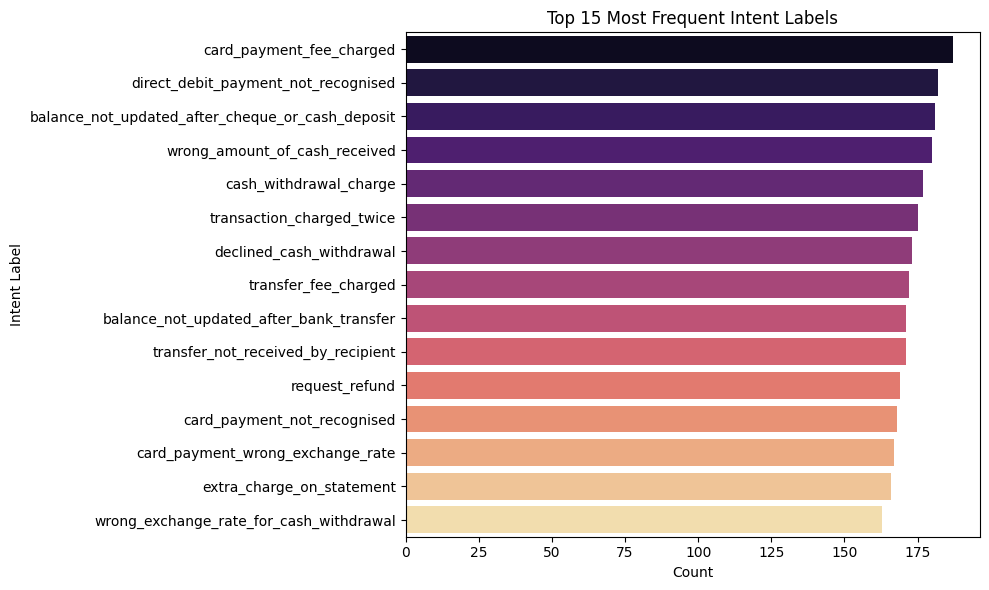

In [ ]:
# Top 15 most frequent intent labels
top_labels = clean_df['label_name'].value_counts().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_labels.values, y=top_labels.index, palette='magma')
plt.title('Top 15 Most Frequent Intent Labels')
plt.xlabel('Count')
plt.ylabel('Intent Label')
plt.tight_layout()
plt.show()

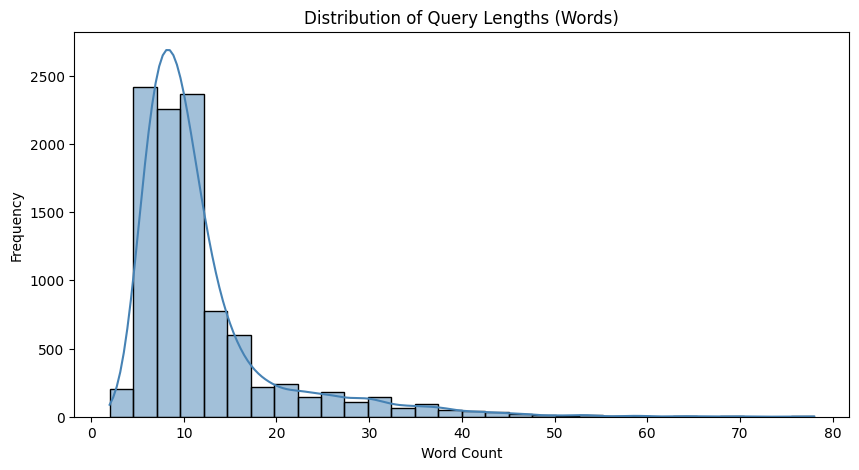

In [ ]:
# Add a new column for word count
clean_df['word_count'] = clean_df['clean_text'].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(clean_df['word_count'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Query Lengths (Words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-10635035.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_df, x='count', y='word', palette='cubehelix')


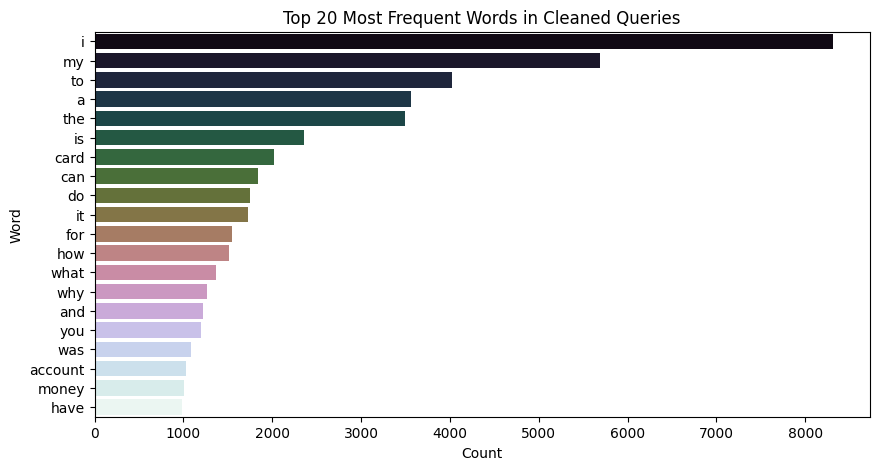

In [ ]:
from collections import Counter
import itertools

# Tokenize all text
all_words = list(itertools.chain.from_iterable([x.split() for x in clean_df['clean_text']]))

# Get word frequencies
word_freq = Counter(all_words).most_common(20)

# Convert to DataFrame for plotting
word_df = pd.DataFrame(word_freq, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=word_df, x='count', y='word', palette='cubehelix')
plt.title("Top 20 Most Frequent Words in Cleaned Queries")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

**Key Insights from EDA**

Based on the visual exploration of the dataset, here are some key takeaways:

- **Few Intents Dominate**: A small set of intents (like `card_payment_fee_charged` and `direct_debit_payment_not_recognised`) cover a majority of queries, indicating focused customer issues.

- **Short, Simple Queries**: Most queries are under 15 words, highlighting the need for models that can understand brief and informal language.

- **Repetitive Vocabulary**: Common words like "my", "card", "account", etc., appear across intents.




# 5. LLM Insights Generation

We will use the Llama model to generate insights from the pre-processed dataset based on a sample of labels.  


**Importing the Llama 2 model**

In this step, we import the two most critical modules for running our local LLaMA model:

`hf_hub_download` from `huggingface_hub`
- Used to **download files (models, configs, tokenizers, etc.)** directly from the Hugging Face Hub.
- Ensures that we always fetch the correct model checkpoint (.gguf) and that it’s stored locally in the appropriate cache.

`Llama` from `llama_cpp`
- This is the main **model wrapper** from the `llama-cpp-python` library.
- It allows us to load a quantized `.gguf` model, configure parameters, and perform **local inference** (prompt completion, chat-style interaction, etc.).

These imports are essential for model initialization and usage. If any of these fail, please make sure the corresponding packages were installed correctly.

In [ ]:
from huggingface_hub import hf_hub_download

In [ ]:
model_name_or_path = "TheBloke/Llama-2-7B-chat-GGUF"
model_basename = "llama-2-7b-chat.Q5_K_M.gguf" # the model is in gguf format

- Meta Llama2 recently presented the GGUF format model files for their Llama2 7B-chat.

- Llama2 is a collection of pretrained and fine-tuned large language models (LLMs) ranging from 7 billion to 70 billion parameters.

- GGUF (Generalized Graph Unification Format) is a new format introduced by the llama.cpp team on August 21st, 2023, as a replacement for the earlier GGML.

- The key benefit of GGUF is that it is a extensible, future-proof format which stores more information about the model as metadata. It also includes significantly improved tokenization code, including for the first time full support for special tokens. This has been shown to improve performance, especially with models that use new special tokens and implement custom prompt templates.


In [ ]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

llama-2-7b-chat.Q5_K_M.gguf:   0%|          | 0.00/4.78G [00:00<?, ?B/s]

**hf_hub_download()**: This is a function from the Hugging Face Hub library that is being called to perform the download operation. It takes two arguments:

- **repo_id**: This argument is set to model_name_or_path, which specifies the model to download. The repo_id typically includes information about the model's repository or identifier.

- **filename**: This argument is set to model_basename, which specifies the desired filename for the downloaded model.

The hf_hub_download() function will connect to the Hugging Face Model Hub, locate the specified model using the provided repo_id, and then download it. The downloaded model will be saved locally with the specified filename. The model_path variable will contain the path to the downloaded model file on your local file system.


In [ ]:
from llama_cpp import Llama

llm = Llama(
    model_path=model_path,
    n_threads=8,         # use all CPU cores available
    n_batch=256,
    n_gpu_layers=-1,     # use GPU if available
    n_ctx=4096           # context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-7B-chat-GGUF/snapshots/191239b3e26b2882fb562ffccdd1cf0f65402adb/llama-2-7b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_co

**model_path=model_path**: Specifies the path to the model.

**n_threads=8**: This parameter is set to 8, which specifies the number of CPU cores that the Llama instance should use for its operations
- Modern CPUs often have multiple cores, allowing them to perform multiple tasks simultaneously. By specifying the number of threads, you're controlling how many of these cores the Llama instance will utilize.

**n_batch=256:** Sets the batch size (between 1 and n_ctx).It's typically used to specify the batch size for processing data with the model.It should be between 1 and n_ctx (context window), taking into consideration the GPU's VRAM capacity.
- In machine learning, especially with deep learning models, data is often processed in batches rather than one sample at a time. This is because it can lead to more efficient computations, taking advantage of parallel processing capabilities in modern hardware.
In this case, n_batch=256 means that the Llama instance is set to process data in batches of 256.
- Choosing an appropriate batch size is important for balancing computational efficiency with memory constraints.

**n_gpu_layers=-1**: Specifies the number of GPU layers (adjust based on GPU VRAM).

**n_ctx=4096**:
 - This parameter specifies the context window size, which is a crucial aspect of how a language model processes and generates text.
- In the context of language models, a "context window" refers to the range of tokens (words or subwords) that the model considers when generating responses or making predictions.
- When the model generates text, it doesn't consider the entire input sequence but focuses on a limited window of context. This helps the model manage memory and computational resources efficiently.
- A larger context window can provide more context for generating coherent and contextually relevant responses. However, it may also come with increased memory requirements, as the model needs to store and process a larger amount of text.
- The choice of n_ctx should strike a balance between the need for context and the available computational resources (both CPU and GPU memory).


In [ ]:
def generate_with_llm(prompt):
    response = llm(
        prompt,
        max_tokens=300,
        temperature=0.7
    )
    out = response["choices"][0]["text"].strip()
    return out if out else "No output generated."

The `generate_with_llm` function is responsible for generating a response from a pre-loaded language model (LLM) based on a given prompt.

**Function Workflow:**
- Accepts a `prompt` as input (text to guide the LLM).
- Calls the LLM with:
  - `max_tokens=300`: Limits the response length.
  - `temperature=0.7`: Controls randomness; higher values produce more diverse outputs.
- Extracts and cleans the generated text from the response.
- Returns the generated output, or `"No output generated."` if the model returns an empty string.

This function helps us interact with the LLM in a structured way for generating intent summaries or other natural language outputs.


In [ ]:
def chunk_text(text, max_words=400):
    words = text.split()
    for i in range(0, len(words), max_words):
        yield " ".join(words[i:i+max_words])

The `chunk_text` function is designed to split large blocks of text into smaller, manageable chunks based on word count. This is especially useful when processing long documents or inputs that exceed model token limits.

**Function Details:**
- **Parameters:**
  - `text`: The original large text string.
  - `max_words`: The maximum number of words allowed per chunk (default is set as 400).
- **How it works:**
  - The function splits the input `text` into a list of individual words.
  - It then iteratively yields smaller strings, each containing up to `max_words` words.

This helps in safely feeding large texts to an LLM by breaking them down into chunks that comply with token constraints.


In [ ]:
def generate_summary_llm(text, label_name):
    # Prepare prompt
    unified_prompt = f"""You are an expert summarizer.
Summarize the customer queries and issues for the label: **{label_name}** into 3-5 crystal-clear bullet points.
- Do not repeat points.
- Make sure each bullet is a complete sentence.
- Keep the language clear and specific.
- End each bullet with proper punctuation.
- Focus only on key themes for this label.
- Be concise and clear.
TEXT:
"""

    # Chunk and summarize
    chunks = list(chunk_text(text, max_words=400))
    summaries = []

    for idx, chunk in enumerate(chunks, 1):
        print(f"Summarizing chunk {idx}/{len(chunks)} for label '{label_name}'...")
        summaries.append(generate_with_llm(unified_prompt + chunk))

    # Final summary from partial summaries
    combined_text = " ".join(summaries)
    return generate_with_llm(unified_prompt + combined_text) if len(chunks) > 1 else summaries[0]

The `generate_summary_llm` function uses the LLM to generate a concise, bullet-point summary of customer queries based on a specific label.

**Function Purpose:**
- To extract 3–5 key insights from long text data (e.g., customer complaints) related to a particular label, using clear and actionable bullet points.

**Key Steps:**
1. **Prompt Creation:**  
   A customized prompt is constructed using the provided `label_name` to ensure the summary is focused and relevant.

2. **Text Chunking:**  
   The input `text` is split into chunks of up to 400 words using the `chunk_text()` function. This ensures compatibility with LLM input limits.

3. **Chunk-wise Summarization:**  
   Each chunk is individually summarized using the `generate_with_llm()` function, and intermediate outputs are stored.

4. **Final Aggregation (if needed):**  
   - If there are multiple chunks, the function combines their summaries and generates one final, unified summary.
   - If there’s only one chunk, the first summary is directly returned.

Its ideal for generating compact summaries from large datasets of customer feedback, categorized by themes or labels like "Account Access," "Billing Issues," etc.


In [ ]:
import random

label_summaries = {}
unique_labels = clean_df['label_name'].unique()
selected_labels = random.sample(list(unique_labels), 4)  # pick 4 random labels

for label_name in selected_labels:
    subset_df = clean_df[clean_df['label_name'] == label_name]
    sampled_texts = subset_df['clean_text'].sample(min(30, len(subset_df)), random_state=42)
    combined_text = " ".join(sampled_texts)

    if combined_text.strip():
        label_summaries[label_name] = generate_summary_llm(combined_text, label_name)

Summarizing chunk 1/1 for label 'verify_my_identity'...


Llama.generate: 22 prefix-match hit, remaining 365 prompt tokens to eval
llama_perf_context_print:        load time =  502887.69 ms
llama_perf_context_print: prompt eval time =  411731.50 ms /   365 tokens ( 1128.03 ms per token,     0.89 tokens per second)
llama_perf_context_print:        eval time =   65218.61 ms /   201 runs   (  324.47 ms per token,     3.08 tokens per second)
llama_perf_context_print:       total time =  477076.34 ms /   566 tokens
Llama.generate: 22 prefix-match hit, remaining 355 prompt tokens to eval


Summarizing chunk 1/1 for label 'edit_personal_details'...


llama_perf_context_print:        load time =  502887.69 ms
llama_perf_context_print: prompt eval time =  792796.56 ms /   355 tokens ( 2233.23 ms per token,     0.45 tokens per second)
llama_perf_context_print:        eval time =   24776.39 ms /    74 runs   (  334.82 ms per token,     2.99 tokens per second)
llama_perf_context_print:       total time =  817611.40 ms /   429 tokens
Llama.generate: 22 prefix-match hit, remaining 566 prompt tokens to eval


Summarizing chunk 1/1 for label 'balance_not_updated_after_cheque_or_cash_deposit'...


llama_perf_context_print:        load time =  502887.69 ms
llama_perf_context_print: prompt eval time =  978778.03 ms /   566 tokens ( 1729.29 ms per token,     0.58 tokens per second)
llama_perf_context_print:        eval time =   40275.68 ms /   122 runs   (  330.13 ms per token,     3.03 tokens per second)
llama_perf_context_print:       total time = 1019178.30 ms /   688 tokens
Llama.generate: 22 prefix-match hit, remaining 496 prompt tokens to eval


Summarizing chunk 1/1 for label 'extra_charge_on_statement'...


llama_perf_context_print:        load time =  502887.69 ms
llama_perf_context_print: prompt eval time =  590191.33 ms /   496 tokens ( 1189.90 ms per token,     0.84 tokens per second)
llama_perf_context_print:        eval time =   52833.69 ms /   162 runs   (  326.13 ms per token,     3.07 tokens per second)
llama_perf_context_print:       total time =  643220.00 ms /   658 tokens


The above code block performs label-specific summarization for a random sample of labels from the cleaned dataset.

**Purpose:**
To create concise summaries of customer feedback grouped under randomly selected labels using an LLM.

**Key Steps:**

1. **Select Random Labels:**
   - Extract unique labels from the `clean_df` DataFrame.
   - Randomly choose 4 labels using `random.sample()`.
   - **Note:** For the purpose of understanding, we are working with a small sample of 4 randomly selected labels. You can experiment with a larger number of labels based on your requirements and compute capacity.


2. **Sample and Combine Texts:**
   - For each selected label, filter the DataFrame to get entries with that label.
   - Sample up to 30 feedback entries for consistency (or all if fewer than 30).
   - Combine the sampled texts into a single string for summarization.

3. **Generate Summary:**
   - Use the `generate_summary_llm()` function to produce a clean, bullet-point summary for each selected label.
   - Store each summary in the `label_summaries` dictionary with the label as the key.


The outcome of this results in a dictionary `label_summaries` containing concise summaries of customer feedback for 4 randomly chosen labels.


In [ ]:
for label, summary in label_summaries.items():
    print("\n" + "="*40)
    print(f"Label: {label}")
    print("="*40)
    print(summary)


Label: verify_my_identity
what do i need to bring to complete identity check?
Bullet points:
* To verify someone's identity, the following documents are typically required: government-issued ID (such as a driver's license, passport, or state ID), proof of address (such as a utility bill or lease agreement), and a copy of a supporting document (such as a birth certificate or social security card).
* If an individual does not have all of the necessary documents, they may still be able to verify their identity through alternative means, such as a credit check or a review of their financial history.
* The identity verification process typically involves a series of steps, including: data validation, identity confirmation, and biometric authentication.
* The specific steps for identity checks may vary depending on the organization or individual requesting the verification, but generally, the process involves verifying the person's identity through a combination of documents and biometric d

# Conclusion

The insights generated reveal recurring pain points across key areas of the customer experience. Users are confused about identity verification requirements, facing difficulties in editing personal information, encountering delays in deposit reflections, and raising concerns about unexplained charges. These issues indicate a need for clearer communication, enhanced transparency, and proactive customer support. Addressing these will not only reduce support load but also build greater trust and satisfaction among customers.

# **Key Business Insights:**

Identity Verification: Users are confused about required steps → Improve clarity and instructions.

Editing Personal Info: Difficult to update details → Simplify UI and backend workflows.

Deposit Issues: Delays in balance updates → Enable real-time tracking of deposits.

Extra Charges: Unexpected fees confuse users → Increase transparency in statements.


The output generated pinpoints top customer pain points, helping teams prioritize CX improvements, reduce support load, and drive process optimization based on real user data.